# ・Extract postcode area from postcard.

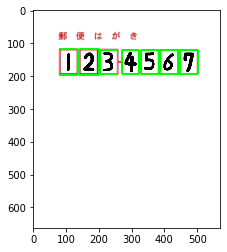

In [12]:
import cv2
import matplotlib.pyplot as plt

#! 
#! This function is modularized as detect_zip.py. 
#!
def detect_zipno(fname):
    #! Load image.
    img = cv2.imread(fname)
    #! Find the size of the image.
    h, w = img.shape[:2]
    #! Extract only the upper right corner of the postcard image.
    img = img[0:h//2, w//3:]
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Smooth image. (画像を平滑化(ぼかし))
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    # Image binarization. (画像を2値化)
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]

    #! Contour extraction.
    #print(cv2.findContours, __doc__)
    cnts = cv2.findContours(im2,
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)[0]

    result = []
    #! Draw the extracted frame.(輪郭抽出)
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        # Eliminate areas that are too large or too small.
        if not 50 < w < 70:
            continue
        result.append([x, y, w, h])
    result = sorted(result, key=lambda x: x[0])

    result2 = []
    lastx = -100
    #! Draw the extracted frame.(輪郭抽出)
    for x, y, w, h in result:
        if (x - lastx) < 10:
            continue
        result2.append([x, y, w, h])
        lastx = x
    #! Draw a green frame.
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    return result2, img

if __name__ == "__main__":
    #! Specify the postcard image and extract the area.
    cnts, img = detect_zipno("hagaki1.png")
    #! Draw the extraction result on the screen.
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi = 200)
    plt.show()

# ・The extracted numeric image is determined.

C:\Users\konan\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\konan\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\konan\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\konan\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\konan\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar inste

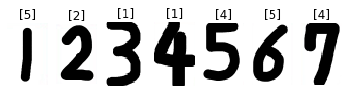

In [34]:
from detect_zip import *
import matplotlib.pyplot as plt

from sklearn.externals import joblib

#! Read trained handwritten digit data.
clf = joblib.load("digits.pkl")

#! Read an area from an image.
cnts, img = detect_zipno("hagaki1.png")

#! Plot the read data.
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    # Reduce by the outline of the frame.
    x += 8
    y += 8
    w -= 16
    h -= 16
    #! Retrieve image data.
    im2 = img[y:y+h, x:x+w]
    #! Fit data to trained.
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    im2gray = cv2.resize(im2gray, (8, 8))
    im2gray = 15 - im2gray
    im2gray = im2gray.reshape((-1, 64))
    #! Predict data.
    res = clf.predict(im2gray)
    #! Output to screen.
    plt.subplot(1, 7, i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()
